Column Names: Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING  

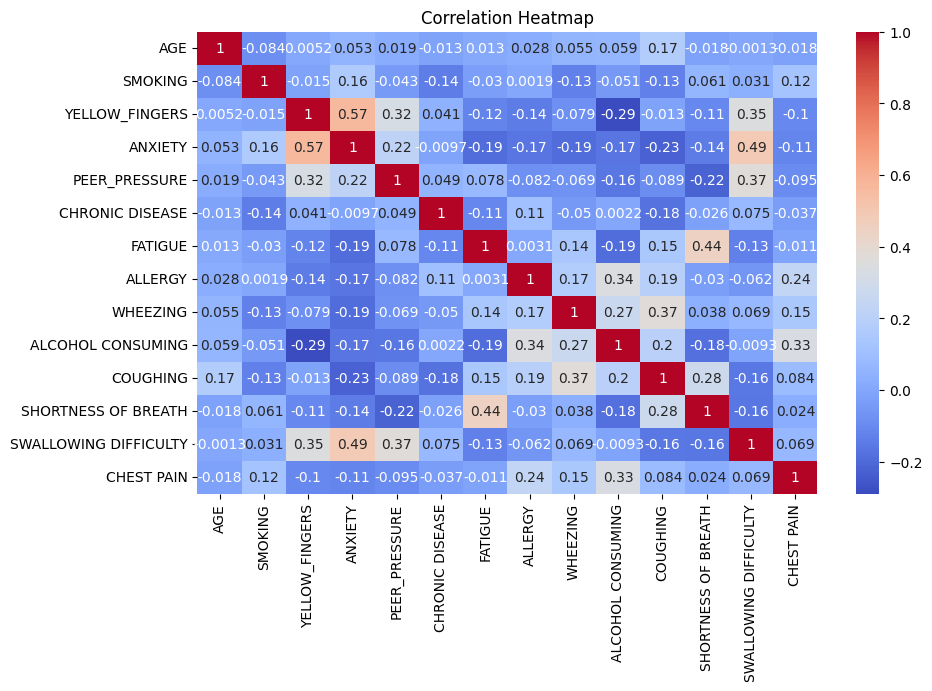

Columns 'Gender' and/or 'Smoking_History' not found for chi-square test.
Columns 'Survived' and/or 'Smoking_History' not found for survival rate analysis.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load the dataset
lung_cancer_df = pd.read_csv('/content/Lung_Cancer_Dataset.csv')

# Display column names to check if 'Age', 'Gender', 'Smoking_History', and 'Survived' are present
print("Column Names:", lung_cancer_df.columns)

# Clean column names by removing leading/trailing spaces
lung_cancer_df.columns = lung_cancer_df.columns.str.strip()

# Check and print dataset info
print("\nDataset Info:")
print(lung_cancer_df.info())

# Basic Statistics
print("\nBasic Statistics:")
print(lung_cancer_df.describe())

# Drop rows with missing values
lung_cancer_df = lung_cancer_df.dropna()

# Check if 'Age' column exists before plotting
if 'Age' in lung_cancer_df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(lung_cancer_df['Age'], kde=True, color='skyblue')
    plt.title('Age Distribution of Lung Cancer Patients')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Age' not found in the dataset.")

# Check if 'Gender' column exists before plotting
if 'Gender' in lung_cancer_df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=lung_cancer_df, x='Gender', palette='viridis')
    plt.title('Gender Distribution')
    plt.show()
else:
    print("Column 'Gender' not found in the dataset.")

# Check if correlation heatmap can be plotted (needs at least 2 numeric columns)
numeric_columns = lung_cancer_df.select_dtypes(include=np.number).columns
if len(numeric_columns) >= 2:
    plt.figure(figsize=(10, 6))
    sns.heatmap(lung_cancer_df[numeric_columns].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("Not enough numerical columns for a correlation heatmap.")

# Chi-square test between 'Gender' and 'Smoking_History' if both columns exist
if 'Gender' in lung_cancer_df.columns and 'Smoking_History' in lung_cancer_df.columns:
    contingency_table = pd.crosstab(lung_cancer_df['Gender'], lung_cancer_df['Smoking_History'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test p-value for Gender and Smoking History: {p:.4f}")
else:
    print("Columns 'Gender' and/or 'Smoking_History' not found for chi-square test.")

# Check if 'Survived' and 'Smoking_History' columns exist before plotting
if 'Survived' in lung_cancer_df.columns and 'Smoking_History' in lung_cancer_df.columns:
    sns.barplot(data=lung_cancer_df, x='Smoking_History', y='Survived', palette='magma')
    plt.title('Survival Rate by Smoking History')
    plt.show()
else:
    print("Columns 'Survived' and/or 'Smoking_History' not found for survival rate analysis.")
